# Snake Classifier

Burada yılan fotoğraflarını kullanarak veri setimizde en fazla olan yılan türünü diğerlerinden ayırmaya çalıştım.

İlk önce *DataPrep.ipynb* ile veri setini indirip istediğim şekle getirdim.

Alt kısımda ise kütüphaneleri importlayıp sistem GPU'muzu algılıyor mu diye baktım...

In [1]:
import pandas as pd 
import numpy as np 
import os
import cv2
import matplotlib.pyplot as plt
import warnings

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow 

import scipy
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))


# Set the seed value for experiment reproduci.bility.
seed = 1842
tensorflow.random.set_seed(seed)
np.random.seed(seed)
# Turn off warnings for cleaner looking notebook
warnings.simplefilter('ignore')



Num GPUs Available:  1


Alttaki kısımda ise örnek koddan farklı olarak test verisini çıkardım. Bu verileri bir yere kayıt etmeyeceğim için deneme için bir veri kenara ayırmadım.

In [2]:
#define image dataset 
#why do we rescale?
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2) #shear_range =.25, zoom_range =.2, horizontal_flip = True, rotation_range=20)     


train_dataset = image_generator.flow_from_directory(batch_size=8,
                                                 directory='cleanDataset/Train',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=8,
                                                 directory='cleanDataset/Train',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="validation",
                                                 class_mode='categorical')



Found 10494 images belonging to 2 classes.
Found 2623 images belonging to 2 classes.


Örnek Fotoğraflar

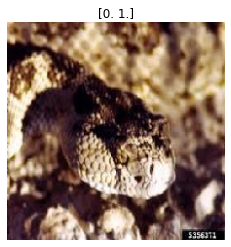

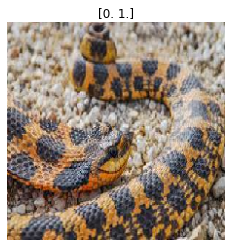

In [3]:
batch_1_img = train_dataset[0]
for i in range(0,2):
    img = batch_1_img[0][i]
    lab = batch_1_img[1][i]
    plt.imshow(img)
    plt.title(lab)
    plt.axis('off')
    plt.show()

# ANN

İlk önce kendimize CNN kullanmadan bir mimari tasarlıyoruz.

Buradaki ayarlar hypertuning ile karşılaşırılabilir. Ben sadece iki çeşit denedim.

In [5]:
model = keras.models.Sequential([
keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
keras.layers.experimental.preprocessing.RandomContrast(0.5),
keras.layers.Flatten(input_shape = [224, 224,3]),                             
keras.layers.Dense(300, activation = 'relu' ),

keras.layers.Dense(400, activation = 'relu' ),

keras.layers.Dense(400, activation = 'relu' ),

keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dense(2, activation = 'softmax')])

model.compile(loss = 'binary_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)
model.fit(train_dataset, epochs=20, validation_data=validation_dataset, callbacks=callback)
#save model
#data manipulation 
#include graphs 

Epoch 1/20
1312/1312 [==============================] - 63s 46ms/step - loss: 0.6664 - accuracy: 0.9681 - val_loss: 0.1882 - val_accuracy: 0.9714
Epoch 2/20
1312/1312 [==============================] - 46s 35ms/step - loss: 0.1397 - accuracy: 0.9714 - val_loss: 0.1378 - val_accuracy: 0.9714
Epoch 3/20
1312/1312 [==============================] - 47s 36ms/step - loss: 0.1352 - accuracy: 0.9714 - val_loss: 0.1327 - val_accuracy: 0.9714
Epoch 4/20
1312/1312 [==============================] - 48s 36ms/step - loss: 0.1496 - accuracy: 0.9714 - val_loss: 0.1306 - val_accuracy: 0.9714
Epoch 5/20
1312/1312 [==============================] - 48s 36ms/step - loss: 0.1310 - accuracy: 0.9714 - val_loss: 0.1301 - val_accuracy: 0.9714
Epoch 6/20
1312/1312 [==============================] - 48s 37ms/step - loss: 0.1308 - accuracy: 0.9714 - val_loss: 0.1298 - val_accuracy: 0.9714
Epoch 7/20
1312/1312 [==============================] - 48s 37ms/step - loss: 0.1314 - accuracy: 0.9714 - val_loss: 0.1300 -

In [10]:
loss, accuracy = model.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

328/328 [==============================] - 6s 17ms/step - loss: 0.1304 - accuracy: 0.9714
Loss:  0.1303756982088089
Accuracy:  0.9714067578315735


*without data augmentation*

Loss:  0.12490320205688477
Accuracy:  0.9714067578315735

*with data augmentation*

Loss:  0.1303756982088089
Accuracy:  0.9714067578315735

In [7]:
#simple ann with 3 layers 
model = keras.models.Sequential([
keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
keras.layers.experimental.preprocessing.RandomContrast(0.5),    

keras.layers.Flatten(input_shape = [224, 224,3]),                             
keras.layers.Dense(300, activation = 'relu' ),
keras.layers.Dropout(0.1),
keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dropout(0.1),
keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dropout(0.1),
keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dense(2, activation = 'softmax')])


model.compile(loss = 'binary_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)

In [8]:
model.fit(train_dataset, epochs=20, validation_data=validation_dataset, callbacks=callback)
#save model
#data manipulation 
#include graphs 

Epoch 1/20
1312/1312 [==============================] - 48s 35ms/step - loss: 0.6686 - accuracy: 0.9694 - val_loss: 0.1373 - val_accuracy: 0.9714
Epoch 2/20
1312/1312 [==============================] - 48s 37ms/step - loss: 0.1581 - accuracy: 0.9713 - val_loss: 0.1741 - val_accuracy: 0.9714
Epoch 3/20
1312/1312 [==============================] - 49s 37ms/step - loss: 0.1807 - accuracy: 0.9713 - val_loss: 0.1454 - val_accuracy: 0.9714
Epoch 4/20
1312/1312 [==============================] - 53s 41ms/step - loss: 0.1398 - accuracy: 0.9714 - val_loss: 0.1339 - val_accuracy: 0.9714
Epoch 5/20
1312/1312 [==============================] - 51s 39ms/step - loss: 0.1380 - accuracy: 0.9714 - val_loss: 0.1326 - val_accuracy: 0.9714
Epoch 6/20
1312/1312 [==============================] - 51s 39ms/step - loss: 0.1332 - accuracy: 0.9714 - val_loss: 0.1309 - val_accuracy: 0.9714
Epoch 7/20
1312/1312 [==============================] - 51s 39ms/step - loss: 0.1868 - accuracy: 0.9713 - val_loss: 0.1325 -

In [12]:
loss, accuracy = model.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

328/328 [==============================] - 6s 17ms/step - loss: 0.1304 - accuracy: 0.9714
Loss:  0.13037563860416412
Accuracy:  0.9714067578315735


*without data augmentation*

Loss:  0.12982332706451416
Accuracy:  0.9714067578315735

*with data augmentation*

Loss:  0.13037563860416412
Accuracy:  0.9714067578315735

# CNN

### First CNN

Burada konvolüsyon işlemi yaparak yapay sinir ağımıza farklı bir yaklaşım sergilettiriyoruz.

Üstteki gibi burada da filtrelerle oynamalar yapıp doğruluk oranının değişimine baktım.

In [14]:
#experiment with Convolutional neural net
model = keras.models.Sequential([
keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
keras.layers.experimental.preprocessing.RandomContrast(0.5),
keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = [224, 224,3]),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(64, (2, 2), activation='relu'),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(64, (2, 2), activation='relu'),
keras.layers.Flatten(),
keras.layers.Dense(100, activation='relu'),
keras.layers.Dense(2, activation ='softmax')])

In [15]:
model.compile(loss = 'binary_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)

In [16]:
model.fit(train_dataset, epochs=20, validation_data=validation_dataset, callbacks=callback)
#save model
#early stopping

Epoch 1/20
1312/1312 [==============================] - 57s 42ms/step - loss: 0.1700 - accuracy: 0.9714 - val_loss: 0.1291 - val_accuracy: 0.9714
Epoch 2/20
1312/1312 [==============================] - 57s 44ms/step - loss: 0.1445 - accuracy: 0.9714 - val_loss: 0.1304 - val_accuracy: 0.9714
Epoch 3/20
1312/1312 [==============================] - 57s 44ms/step - loss: 0.1384 - accuracy: 0.9714 - val_loss: 0.1315 - val_accuracy: 0.9714
Epoch 4/20
1312/1312 [==============================] - 61s 47ms/step - loss: 0.1394 - accuracy: 0.9714 - val_loss: 0.1306 - val_accuracy: 0.9714


In [17]:
loss, accuracy = model.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

328/328 [==============================] - 6s 19ms/step - loss: 0.1291 - accuracy: 0.9714
Loss:  0.12913520634174347
Accuracy:  0.9714067578315735


*without data augmentation*

Loss:  0.12951813638210297
Accuracy:  0.9714067578315735

*with data augmentation*

Loss:  0.12913520634174347
Accuracy:  0.9714067578315735



### Second CNN

In [4]:
model = keras.models.Sequential([
keras.layers.Conv2D(224, (3, 3), activation='relu', input_shape = [224, 224,3]),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(448, (2, 2), activation='relu'),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(448, (2, 2), activation='relu'),
keras.layers.Flatten(),
keras.layers.Dense(100, activation='relu'),
keras.layers.Dense(2, activation ='softmax')])

In [5]:
model.compile(loss = 'binary_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)

In [6]:
model.fit(train_dataset, epochs=20, validation_data=validation_dataset, callbacks=callback)
#save model
#early stopping

Epoch 1/20
1312/1312 [==============================] - 156s 116ms/step - loss: 0.2053 - accuracy: 0.9693 - val_loss: 0.1301 - val_accuracy: 0.9714
Epoch 2/20
1312/1312 [==============================] - 153s 117ms/step - loss: 0.1646 - accuracy: 0.9701 - val_loss: 0.1304 - val_accuracy: 0.9714
Epoch 3/20
1312/1312 [==============================] - 153s 117ms/step - loss: 0.1418 - accuracy: 0.9714 - val_loss: 0.1389 - val_accuracy: 0.9714
Epoch 4/20
1312/1312 [==============================] - 153s 117ms/step - loss: 0.1458 - accuracy: 0.9706 - val_loss: 0.1298 - val_accuracy: 0.9714
Epoch 5/20
1312/1312 [==============================] - 152s 116ms/step - loss: 0.1341 - accuracy: 0.9714 - val_loss: 0.1311 - val_accuracy: 0.9714
Epoch 6/20
1312/1312 [==============================] - 152s 116ms/step - loss: 0.1348 - accuracy: 0.9714 - val_loss: 0.1338 - val_accuracy: 0.9714
Epoch 7/20
1312/1312 [==============================] - 153s 117ms/step - loss: 0.1442 - accuracy: 0.9714 - val_

In [7]:
loss, accuracy = model.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

328/328 [==============================] - 11s 34ms/step - loss: 0.1298 - accuracy: 0.9714
Loss:  0.12982484698295593
Accuracy:  0.9714067578315735


# VGG Transfer Learning

VGG19'u kullanarak transfer learning ile elde edeceğimiz sonuçlara bakmak amacıyla böyle bir yol izliyorum...

In [8]:
vgg = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)

modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
modelvgg.compile(
  loss='binary_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=4,
                                            restore_best_weights=True)

In [10]:
modelvgg.fit(train_dataset, epochs=20, validation_data=validation_dataset, callbacks=callback)


Epoch 1/20
1312/1312 [==============================] - 84s 63ms/step - loss: 0.1880 - accuracy: 0.9660 - val_loss: 0.1373 - val_accuracy: 0.9745
Epoch 2/20
1312/1312 [==============================] - 83s 63ms/step - loss: 0.0935 - accuracy: 0.9769 - val_loss: 0.2986 - val_accuracy: 0.9722
Epoch 3/20
1312/1312 [==============================] - 84s 64ms/step - loss: 0.0723 - accuracy: 0.9817 - val_loss: 0.1316 - val_accuracy: 0.9752
Epoch 4/20
1312/1312 [==============================] - 86s 65ms/step - loss: 0.0628 - accuracy: 0.9844 - val_loss: 0.1556 - val_accuracy: 0.9665
Epoch 5/20
1312/1312 [==============================] - 87s 66ms/step - loss: 0.0723 - accuracy: 0.9846 - val_loss: 0.2137 - val_accuracy: 0.9764
Epoch 6/20
1312/1312 [==============================] - 87s 66ms/step - loss: 0.0594 - accuracy: 0.9868 - val_loss: 0.2035 - val_accuracy: 0.9779
Epoch 7/20
1312/1312 [==============================] - 88s 67ms/step - loss: 0.0682 - accuracy: 0.9879 - val_loss: 0.1779 -

In [13]:
loss, accuracy = modelvgg.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

328/328 [==============================] - 16s 49ms/step - loss: 0.1316 - accuracy: 0.9752
Loss:  0.13157036900520325
Accuracy:  0.975219190120697


## Karşılaştırma

### ANN:
#### Dropoutlu:

Loss:  0.12982332706451416

Accuracy:  0.9714067578315735

#### Dropoutsuz:

Loss:  0.12490320205688477

Accuracy:  0.9714067578315735


### CNN
#### Küçük Filtreler:

Loss:  0.12951813638210297

Accuracy:  0.9714067578315735

#### Büyük Filtreler:

Loss:  0.12982484698295593

Accuracy:  0.9714067578315735


### VGG

Loss:  0.13157036900520325

Accuracy:  0.975219190120697